In [4]:
from diffusion_conditional_masked import *

GPU Av: 8


In [76]:
# hardcoding these here
seed = 0

n_epoch = 100
batch_size = 256
n_T = 400 # 500
device = "cuda:2"
n_classes = 10 + 1
target_domain_index = 1

n_domains = 4
n_feat = 128 # 128 ok, 256 better (but slower)
lrate = 1e-4
save_model = True
save_dir = './data/diffusion_outputs_masked/'
ws_test = [0.0, 0.5, 2.0] # strength of generative guidance
save_gif = False

in_channels = 3 #1

ddpm = DDPM(nn_model=ContextUnet(in_channels=in_channels, n_feat=n_feat, n_classes=n_classes, n_domains=n_domains), betas=(1e-4, 0.02), n_T=n_T, device=device, drop_prob=0.1)
ddpm.to(device)

ddpm.load_state_dict(torch.load('data/diffusion_outputs_masked/model_99.pth',map_location=device))

<All keys matched successfully>

In [77]:

with torch.no_grad():
    x_gen, _ = ddpm.sample(n_classes * n_domains, (in_channels, 28, 28), device, guide_w = 2)
    #x_gen, x_gen_store = ddpm.sample(n_sample, (in_channels, 28, 28), device, guide_w=w)
    #x_gen, _ = ddpm.sample_from_one_domain(n_classes * n_domains, (in_channels, 28, 28), target_domain = 1, device=device, guide_w=2)

In [106]:
imgages, labels = torch.load("../data/mnist_m_synthetic/MNIST_M_SYNTHETIC_train.pt")
img.shape

()

0.23522806 0.7853553


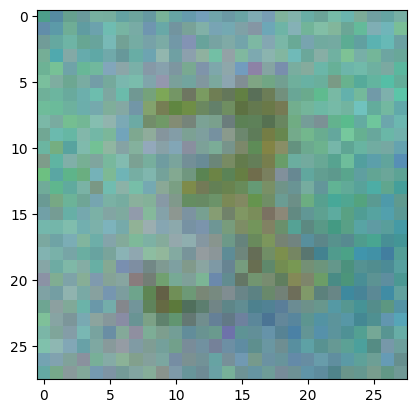

In [91]:
aa = x_gen[14].permute(1, 2, 0).clone().detach().cpu().numpy()
aa = aa*-1 + 1
aa = (aa - 0.5)
print(aa.min(), aa.max())
plt.imshow(aa)

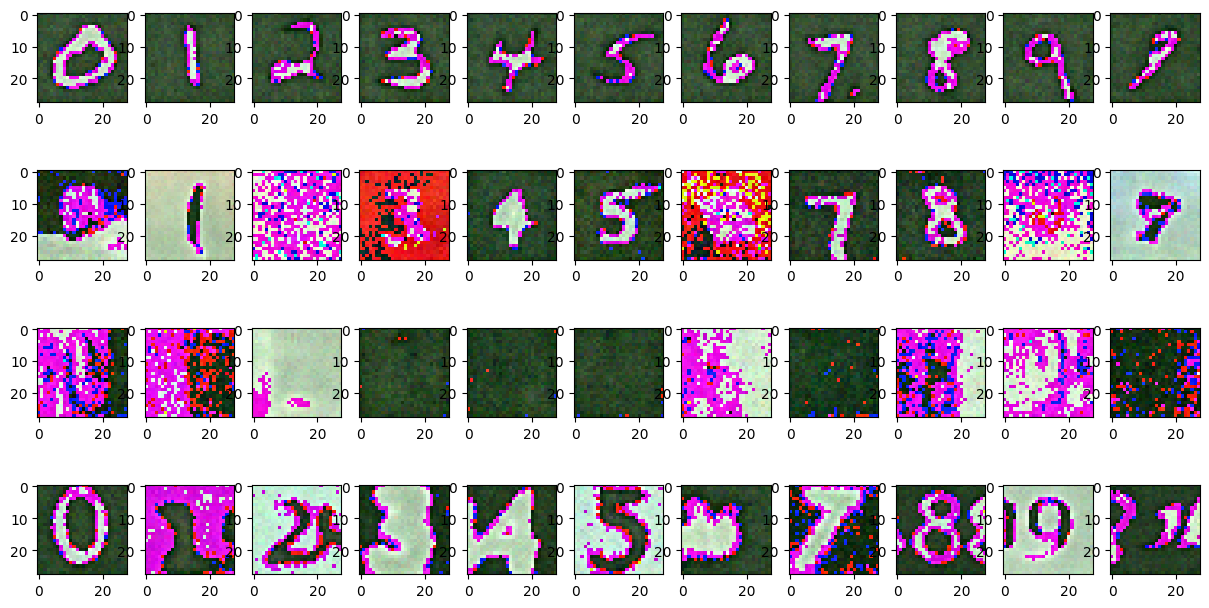

In [114]:
from matplotlib.pyplot import figure
from PIL import Image
figure(figsize=(15, 2*8))
for j in range(4):
    for i in range(11):
        plt.subplot(8,11,  j*11 + i+1)
        #img = img[j*11 + i].permute(1, 2, 0).clone().detach().cpu().numpy()
        img = x_gen[j*11 + i].permute(1, 2, 0).clone().detach().cpu().numpy()
        #img = imgages[j*11 + i]
        #print(img.min(), img.max())
        img = img*-1 + 1
        img = (img * 255).astype(np.uint8)
        #img = img - img.min()
        #print(img.min(), img.max())
        #for i in range(3):
        #    img[:,:,i] = (img[:,:,i] - img[:,:,i].min())/(img[:,:,i].max() - img[:,:,i].min())
        #print(aa[:,:,0].min(), aa[:,:,0].max())
        #print(aa[:,:,1].min(), aa[:,:,1].max())
        #print(aa[:,:,2].min(), aa[:,:,2].max())
        #img = x_gen_copy[j*11 + i].permute(1, 2, 0).cpu().detach().numpy()
        #img = np.array(bigimg)[j*32:(j+1)*32, i*32:(i+1)*32]
        #print(img.shape)
        #img = np.array(Image.fromarray((img.cpu().detach().numpy() * 255)).astype(np.uint8)).resize(size=(32, 32))
        #img = (img - img.min())/(img.max() - img.min())
        #img = (img.cpu().detach().numpy() * 255).astype(np.uint8) #.shape
        
        #plt.title(labels_filtered[j*11 + i])
        #img = (img - img.min())/(img.max() - img.min())
        #img = img
        plt.imshow(img)

In [62]:
from torchvision.utils import save_image, make_grid, save_image
grid = make_grid(x_gen * (-1) + 1, nrow=11)

In [63]:
save_image(grid, "test.png")

In [130]:
bigimg = Image.open("data/diffusion_outputs_masked/image_ep99_w2.0.png")
bigimg = bigimg.resize(( 28*11 + 12, 28 * 32 + 29))

In [125]:
imgages, labels = torch.load("../data/mnist_m/MNIST_M_SYNTHETIC_train.pt")


(896, 308, 3)

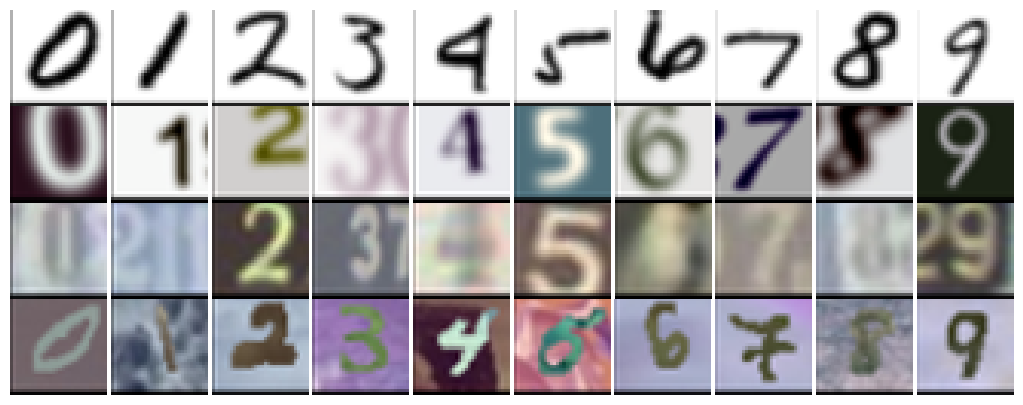

In [161]:
from matplotlib.pyplot import figure
from PIL import Image
figure(figsize=(13, 10))
for j in range(4):
    for i in range(10):
        plt.subplot(8,10,  j*10 + i+1)
        #img = x_gen_copy[j*11 + i].permute(1, 2, 0).cpu().detach().numpy()
        #img = np.array(bigimg)[j*32:(j+1)*32, i*32:(i+1)*32]
        

        plt.subplot(8,10,  j*10 + i+1)
        jj = j
        if(j == 1):
            jj = 3
        if(j == 3):
            jj = 1
        jj += 20
        #img = out[jj*10 + i] #.cpu().detach().numpy()
        #img = (img*-1)+1
        #plt.title((y[j*10 + i].detach().cpu().item(), yd[j*10 + i].detach().cpu().item()))
        #img = (img - img.min())/(img.max() - img.min())
        #img = img.detach().cpu().numpy().transpose(1, 2, 0)

        mult = 28
        img = np.array(bigimg)[jj*mult + jj+1:(jj+1)*mult +jj+1, i*mult + (i+1):(i+1)*mult + (i+1)]
        img = np.array(Image.fromarray(img).resize((36,36)))
        #if(jj == 20):
        #    img = 1-img
        plt.axis("off")
        plt.imshow(img)
        
        plt.imshow(img[1:33, 1:33, :])
        #plt.imshow(img)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig("real.png")

In [40]:
x_gen_copy = x_gen.clone()
img = x_gen_copy[0*11 + i].permute(1, 2, 0)
#img = (img*-1)+1
img = (img - img.min())/(img.max() - img.min())
img.min(), img.max()

(tensor(0., device='cuda:2'), tensor(1., device='cuda:2'))

In [48]:
img.min(), img.max()

(0.0, 1.0)

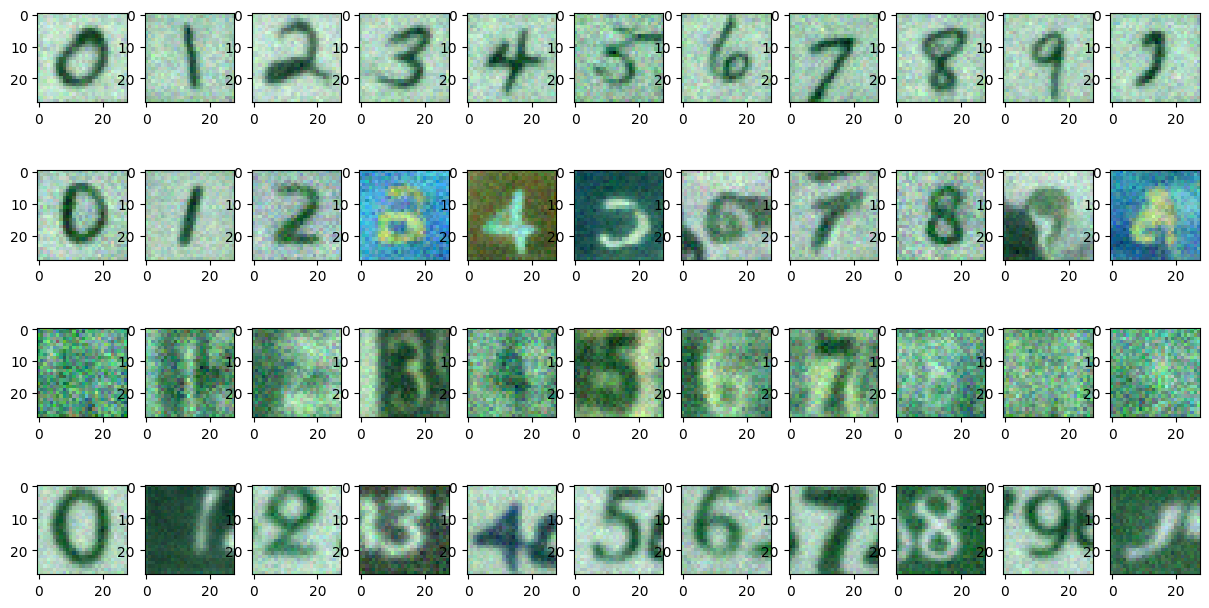

In [47]:
x_gen_copy = x_gen.clone()

from matplotlib.pyplot import figure
from PIL import Image
figure(figsize=(15, 2*8))
for j in range(4):
    for i in range(11):
        plt.subplot(8,11,  j*11 + i+1)
        img = x_gen_copy[j*11 + i].permute(1, 2, 0).cpu().detach().numpy()
        img = (img*-1)+1
        #print(img.shape)
        #img = np.array(Image.fromarray((img.cpu().detach().numpy() * 255)).astype(np.uint8)).resize(size=(32, 32))
        #img = (img - img.min())/(img.max() - img.min())
        #img = (img.cpu().detach().numpy() * 255).astype(np.uint8) #.shape
        
        #plt.title(labels_filtered[j*11 + i])
        img = (img - img.min())/(img.max() - img.min())
        #img = img
        plt.imshow(img)

(28, 28, 3)

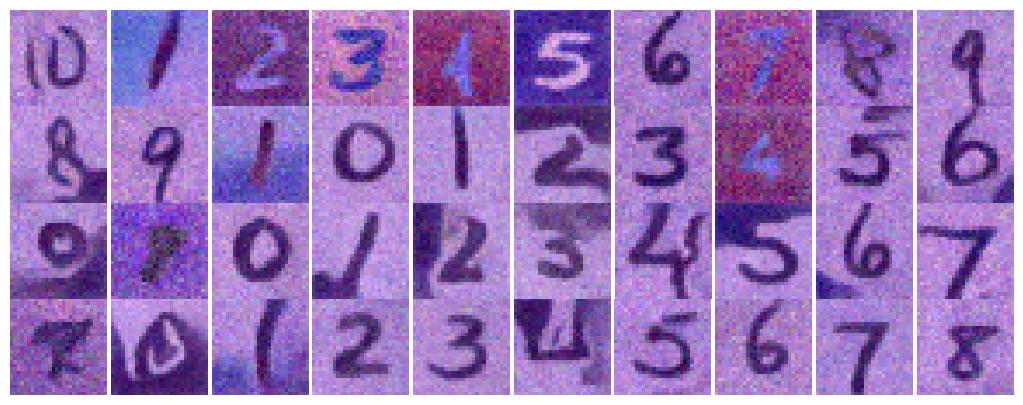

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(13, 10))
for j in range(4):
    for i in range(10):
        plt.subplot(8,10,  j*10 + i+1)
        jj = j
        if(j == 1):
            jj = 3
        if(j == 3):
            jj = 1
        img = x_gen[jj*10 + i] #.cpu().detach().numpy()
        
        img = (img*-1)+1
        #plt.title((y[j*10 + i].detach().cpu().item(), yd[j*10 + i].detach().cpu().item()))
        img = (img - img.min())/(img.max() - img.min())
        img = img.detach().cpu().numpy().transpose(1, 2, 0)
        plt.axis("off")
        plt.imshow(img)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("F_syn.png")

In [ ]:
ws_test = [0.0, 0.5, 2.0]
n_sample = n_classes * 2 *n_domains
with torch.no_grad():
    x_gen, x_gen_store = ddpm.sample(n_sample, (in_channels, 28, 28), device, guide_w=2.0)
#x_gen, x_gen_store = ddpm.sample_from_one_domain(n_sample, (in_channels, 28, 28), target_domain = 1, device=device, guide_w=2)

In [ ]:
transforms_train = transforms.Compose([transforms.Resize(28),transforms.ToTensor()])
dataset = source_domain_numpy(root="../data", root_list='mnist,mnist_m,svhn,syn_digits', transform=transforms_train)

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 2*8))
for j in range(8):
    for i in range(11):
        plt.subplot(8,11,  j*11 + i+1)
        img = dataset[j*11 + i][0].cpu().detach().numpy()
        img = (img - img.min())/(img.max() - img.min())
        img = img.transpose(1, 2, 0)
        plt.imshow(img)

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(15, 2*8))
for j in range(8):
    for i in range(11):
        plt.subplot(8,11,  j*11 + i+1)
        img = x_gen[j*11 + i].cpu().detach().numpy()
        img = (img*-1)+1
        img = (img - img.min())/(img.max() - img.min())
        img = img.transpose(1, 2, 0)
        plt.imshow(img)

In [ ]:
ws_test = [0.0, 0.5, 2.0]
batch_size = 32
n_sample = n_classes * batch_size #n_domains
req_size = 25000 #n_sample - batch_size #20000
ddpm.eval()
x_gen_all = []
with torch.no_grad():
    w = 2
    for itr in tqdm(range(int(req_size/(n_sample - batch_size)))):
        x_gen, _ = ddpm.sample_from_one_domain(n_sample, (in_channels, 28, 28), target_domain = 1, device=device, guide_w=random.uniform(0, 10))
        x_gen_all.append(x_gen)

In [ ]:
synthetic_images = torch.concat(x_gen_all, axis=0)
labels = torch.tensor([i for j in range(int(len(synthetic_images)/n_classes)) for i in range(n_classes) ])
synthetic_images_filtered, labels_filtered = synthetic_images[labels != n_classes-1], labels[labels != n_classes-1]

synthetic_images_filtered = synthetic_images_filtered.permute(0, 2, 3, 1)
synthetic_images_filtered_32 = np.stack(np.array([Image.fromarray((img.cpu().detach().numpy() * 255).astype(np.uint8)).resize(size=(32, 32)) for img in synthetic_images_filtered]))



In [ ]:
#save_path = "../data/mnist_m_synthetic/MNIST_M_SYNTHETIC_train.pt"
save_path = "../data/mnist_m_synthetic_uniformw/MNIST_M_SYNTHETIC_UNIFORMW_train.pt"
torch.save([synthetic_images_filtered_32, labels_filtered.cpu().detach().numpy()], save_path)

NameError: name 'synthetic_images_filtered_32' is not defined

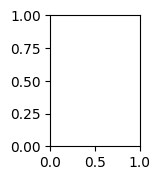

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(15, 2*8))
for j in range(8):
    for i in range(11):
        plt.subplot(8,11,  j*11 + i+1)
        img = synthetic_images_filtered_32[j*11 + i] #.cpu().detach().numpy()
        img = (img*-1)+1
        plt.title(labels_filtered[j*11 + i])
        img = (img - img.min())/(img.max() - img.min())
        #img = img.transpose(1, 2, 0)
        plt.imshow(img)

In [ ]:
import torch 

aa = torch.zeros((10, 5, 4, 3))

In [ ]:
aa.unsqueeze(1).shape